## **Trabalho - Aprendizado Não Supervisionado**

In [95]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **ATRIBUTOS:**:

1 - Acidez Fixa

2 - Acidez Volátil

3 - Ácido Cítrico

4 - Açúcar Residual

5 - Cloretos

6 - Dióxido de Enxofre Livre

7 - Total de Dióxido de Enxofre

8 - Densidade

9 - pH

10 - Sulfatos

11 - Álcool

Variável de saída (com base em dados sensoriais):

12 - Qualidade (pontuação entre 0 e 10)

###**EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [99]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [100]:
df.rename(columns={'fixed acidity': 'Acidez Fixa', 'volatile acidity': 'Acidez Volatil', 'citric acid': 'Acido Citrico', 'residual sugar': 'Acucar Residual' ,'chlorides': 'Cloretos', 
                   'free sulfur dioxide': 'Dioxido de Enxofre Livre', 'total sulfur dioxide': 'Total de Dioxido de Enxofre', 'density': 'Densidade', 'sulphates': 'Sulfatos', 
                   'alcohol': 'Alcool', 'quality': 'Qualidade'}, inplace=True)

In [101]:
df.head(1)

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Transformar variáveis categóricas em numéricas**

Não é necessario pois todas as colunas são de valores númericos

### Análise dos Componentes Principais (PCA)

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=2)

In [104]:
pca_transform = pca.fit_transform(df)

In [105]:
pca_transform.shape

(1599, 2)

In [106]:
pca_transform

array([[-13.22202658,  -2.03192212],
       [ 22.04025471,   4.40179054],
       [  7.16536169,  -2.50832073],
       ...,
       [ -3.43293096,  14.27427694],
       [  1.13557385,  16.30769238],
       [ -3.87592057,   3.13011173]])

In [107]:
pca.explained_variance_ratio_

array([0.94607951, 0.04834835])

In [108]:
pca.explained_variance_ratio_.sum()

0.9944278609084182

In [109]:
import plotly.express as px

In [110]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_transform,
    labels=labels,
    dimensions=range(2), # numero de componentes do pca (PCA(n_components=2))
    color=df["Qualidade"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

### **K-Means com dois atributos**

**Escalonamento**

In [111]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
df_esc = escala.fit_transform(df)

**K-Means**

In [112]:
dados = df.iloc[:, [5,6]].values
dados

array([[11., 34.],
       [25., 67.],
       [15., 54.],
       ...,
       [29., 40.],
       [32., 44.],
       [18., 42.]])

**Elbow Method**

In [113]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)

    wcss.append(kmeans.inertia_)

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

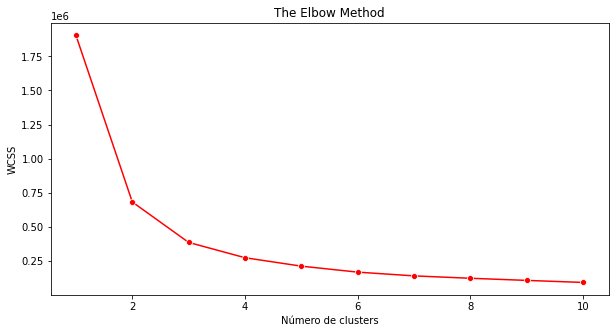

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [116]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(dados)

In [117]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 21.57234432,  54.72527473],
       [ 26.08024691, 108.28806584],
       [  8.97283951,  22.35555556]])

In [118]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [119]:
dados[10,:]

array([15., 65.])

In [120]:
classificacao[10]

0

In [121]:
import plotly.express as px
import plotly.graph_objects as go

In [122]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Dioxido de Enxofre Livre')
graf3.update_yaxes(title = 'Total de Dioxido de Enxofre')
graf3.show()

In [123]:
grupos = pd.DataFrame(classificacao, columns = ['Grupo'])
grupos

,Grupo
0,2
1,0
2,0
3,0
4,2
...,...
1594,0
1595,0
1596,0
1597,0


In [124]:
df_2_atributos = df[['Dioxido de Enxofre Livre','Total de Dioxido de Enxofre']]
df_2_atributos

,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre
0,11.0,34.0
1,25.0,67.0
2,15.0,54.0
3,17.0,60.0
4,11.0,34.0
...,...,...
1594,32.0,44.0
1595,39.0,51.0
1596,29.0,40.0
1597,32.0,44.0


In [125]:
df_grupos = pd.concat([df_2_atributos, grupos],axis=1)
df_grupos

,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Grupo
0,11.0,34.0,2
1,25.0,67.0,0
2,15.0,54.0,0
3,17.0,60.0,0
4,11.0,34.0,2
...,...,...,...
1594,32.0,44.0,0
1595,39.0,51.0,0
1596,29.0,40.0,0
1597,32.0,44.0,0


In [126]:
df_grupos.iloc[150 , :]

Dioxido de Enxofre Livre        5.0
Total de Dioxido de Enxofre    11.0
Grupo                           2.0
Name: 150, dtype: float64

**Indice do grupo 1**

In [127]:
grupo_1 = df_grupos.loc[df_grupos.Grupo == 1]
grupo_1 

,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Grupo
9,17.0,102.0,1
11,17.0,102.0,1
14,52.0,145.0,1
15,51.0,148.0,1
16,35.0,103.0,1
...,...,...,...
1561,31.0,131.0,1
1572,35.0,104.0,1
1574,23.0,92.0,1
1583,32.0,98.0,1


In [128]:
grupo_1.shape

(242, 3)

# **K Means com todos os atributos**

In [129]:
df_esc

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

**Elbow Method**

In [130]:
wcss2 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_esc)

    wcss2.append(kmeans.inertia_)

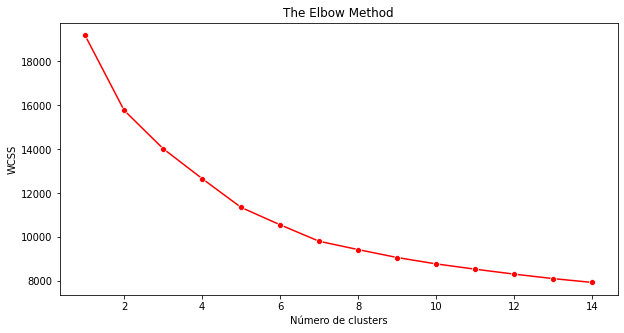

In [131]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss2,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [132]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5, max_iter = 300) 
kmeans2 = kmeans.fit(df_esc)

In [133]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.06498832,  0.06812717,  0.10422954,  0.50215312,  0.02354897,
         1.10518137,  1.3830764 ,  0.40453757, -0.1645666 , -0.18041008,
        -0.60945856, -0.45315066],
       [-0.46986197,  0.67036417, -0.78133542, -0.22960386, -0.07089461,
        -0.39899017, -0.3634306 , -0.07301039,  0.38319325, -0.42244633,
        -0.45876744, -0.47027244],
       [ 1.36248392, -0.68202165,  1.14210247,  0.15880485, -0.01587859,
        -0.53552482, -0.52839004,  0.80645338, -0.84051986,  0.32713598,
         0.18823707,  0.41300007],
       [ 0.06532185,  0.0103135 ,  1.10416018, -0.4082848 ,  5.52313653,
        -0.08685714,  0.50070009,  0.18055137, -1.67454694,  3.62449166,
        -0.88828122, -0.37493231],
       [-0.63235474, -0.43150994, -0.14275703, -0.23837502, -0.38150901,
         0.17498766, -0.20849958, -1.14494106,  0.57880628,  0.18971461,
         1.20905294,  0.79267744]])

In [134]:
# Classificação dos dados
classificacao_2 = kmeans2.labels_
classificacao_2

array([1, 1, 1, ..., 4, 1, 4], dtype=int32)

In [135]:
agrupamento_2 = pd.DataFrame(classificacao_2, columns = ['Grupo'])
agrupamento_2

,Grupo
0,1
1,1
2,1
3,2
4,1
...,...
1594,1
1595,4
1596,4
1597,1


In [136]:
df_grupos_2 = pd.concat([df, agrupamento_2],axis=1)
df_grupos_2

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade,Grupo
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,4
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,4
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [137]:
df_grupos_2.iloc[300 , :]

Acidez Fixa                     7.5000
Acidez Volatil                  0.5300
Acido Citrico                   0.0600
Acucar Residual                 2.6000
Cloretos                        0.0860
Dioxido de Enxofre Livre       20.0000
Total de Dioxido de Enxofre    44.0000
Densidade                       0.9965
pH                              3.3800
Sulfatos                        0.5900
Alcool                         10.7000
Qualidade                       6.0000
Grupo                           1.0000
Name: 300, dtype: float64

In [138]:
df_grupos_2.loc[df_grupos_2.Cloretos == 0.062] 
#df_grupos_2.loc[df_grupos_2.AcidezFixa == 7.4]

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade,Grupo
87,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5,1
93,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5,1
309,7.4,0.290,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6,1
439,7.0,0.620,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3,5,1
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6,5,2
709,9.7,0.310,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,6,2
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6,2
1000,7.5,0.430,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.5,7,4
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5,1
1121,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6,4


**Indice do grupo 4**

In [139]:
grupo_4 = df_grupos_2.loc[df_grupos_2.Grupo == 4]
grupo_4

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade,Grupo
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,4
84,6.3,0.30,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.3,6,4
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,4
128,8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,4
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,4
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,4
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,4
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,4


In [140]:
grupo_4.shape

(337, 13)

# **Agrupamento Hierárquico: todos atributos**


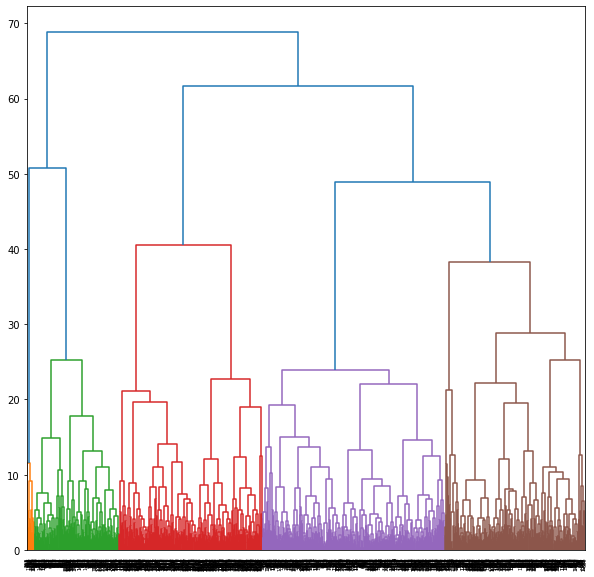

In [141]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df_esc, method = 'ward')) #complete, single e ward (dados dispersos)

In [142]:
from sklearn.cluster import AgglomerativeClustering

In [148]:
hier = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage = 'ward')
classificacao = hier.fit_predict(df_esc)

In [149]:
classificacao

array([2, 1, 1, ..., 5, 5, 4])

**Agrupamento**

In [150]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,1
2,1
3,0
4,2
...,...
1594,5
1595,5
1596,5
1597,5


In [151]:
df_hc = pd.concat([df, agrupamento],axis=1)
df_hc

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade,Grupo
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,5
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,5
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,5


In [152]:
agrupamento.value_counts()

Grupo
2        297
0        234
1        225
5        223
3        155
8        109
11       100
4         88
10        88
6         40
7         22
9         18
dtype: int64

In [156]:
grupo = df_hc.loc[df_hc.Grupo == 9]
grupo.head()

,Acidez Fixa,Acidez Volatil,Acido Citrico,Acucar Residual,Cloretos,Dioxido de Enxofre Livre,Total de Dioxido de Enxofre,Densidade,pH,Sulfatos,Alcool,Qualidade,Grupo
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,9
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,9
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,9
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9,6,9
